In [2]:
#Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
import math
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 5.2 Linear Regression

Regression is used to predict a continuous output variable. One way to model this is a `LinearRegression` (also known as [*Ordinary Least Squares (OLS)*](https://en.wikipedia.org/wiki/Ordinary_least_squares) regression).

The interface for LinearRegression is exactly the same as for the previous classifier, only that ``y`` now contains float values, instead of classes.

## 5.2.1 Creating some sample data

In [3]:
#this creates the toy data for the rest of the excercise
n_obs = 100
x = np.linspace(-3, 3, n_obs)
y = x + x*np.random.normal(2,.5,n_obs)

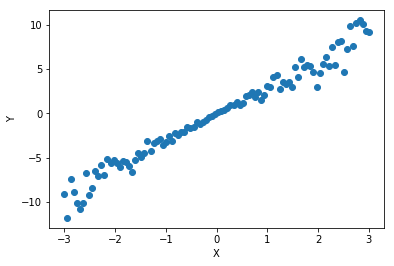

In [4]:
#plot our data
plt.plot(x, y, 'o')
plt.xlabel('X')
plt.ylabel('Y');

## 5.2.2 Creating numpy matrices

As we remember, the scikit-learn API requires us to provide the target variable (`y`) as a 1-dimensional array; scikit-learn's API expects the samples (`X`) in form a 2-dimensional array -- even though it may only consist of 1 feature. Thus, let us convert the 1-dimensional `x` NumPy array into an `X` array with 2 axes:


In [7]:
print('Before: ', x.shape)
X = x.reshape(-1,1)
print('After: ', X.shape)

Before:  (100,)
After:  (100, 1)


In [8]:
print('Before: ', x.shape)
X = x[:, np.newaxis]
print('After: ', X.shape)

Before:  (100,)
After:  (100, 1)


## 5.2.3 Splitting data in training and testing sets

Again, we start by splitting our dataset into a training (75%) and a test set (25%)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 5.2.4 Training the regression model

Next, we use the learning algorithm implemented in `LinearRegression` to **fit a regression model to the training data**:

In [10]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 5.2.5 Model interpretation

In [11]:
print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

Weight coefficients:  [3.0878161]
y-axis intercept:  -0.14331882550953742


Since our regression model is a linear one, the relationship between the target variable (y) and the feature variable (x) is defined as 

$$y = weight * x + \text{intercept}$$

Scikit-learn will automatically optimise the weight parameter and intercept.

Plugging in the min and max values into this equation, we can plot the regression fit to our training data:

Text(0, 0.5, 'Y')

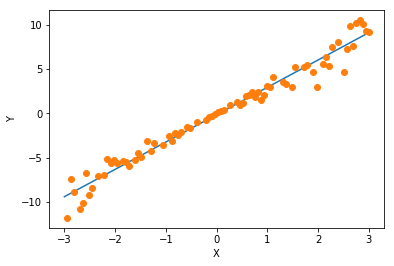

In [12]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o')

plt.xlabel("X")
plt.ylabel("Y")

This blue line is our prediction for y for different values of x. 

## 5.2.6 Model evaluation

Again, scikit-learn provides an easy way to evaluate the prediction quantitatively using the ``score`` method. For regression tasks, this is the R<sup>2</sup> score and the Mean Squared Error (MSE).

The definition of R<sup>2</sup> scored is fairly straight-forward; it is the percentage of the response variable variation that is explained by your linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:
- 0% indicates that the model explains none of the variability of the response data around its mean.
- 100% indicates that the model explains all the variability of the response data around its mean.


Another popular way would be the Mean Squared Error (MSE). As its name implies, the MSE is simply the average squared difference over the predicted and actual target values. The lower this value, the more your model fits your data.

$$MSE = \frac{1}{n} \sum^{n}_{i=1} (\text{predicted}_i - \text{true}_i)^2$$

In [13]:
print('The R2 score of the model on the test set is:', regressor.score(X_test, y_test))


The R2 score of the model on the test set is: 0.9731033366291817


In [14]:
y_pred = regressor.predict(X_test)
print('The MSE of the model on the test set is:', mean_squared_error(y_test, y_pred))

The MSE of the model on the test set is: 0.6748039616429863


Another performance metric uses the absolute value rather than the squared value, resulting in a more interpretable deviation from the real values, giving a better idea on how reliable the results of the model are. 

$$MSE = \frac{1}{n} \sum^{n}_{i=1} \vert \text{predicted}_i - \text{true}_i \vert$$

In [15]:
y_pred = regressor.predict(X_test)
print('The MAE of the model on the test set is:', mean_absolute_error(y_test, y_pred))

The MAE of the model on the test set is: 0.624159092606009


## 5.2.7 Task 1: Outliers

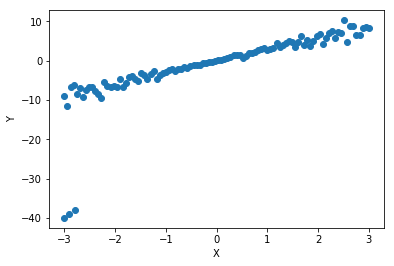

In [16]:
#create data for our regression
n_obs = 100
x = np.linspace(-3, 3, n_obs)
y = x + x*np.random.normal(2,.5,n_obs)

#add  outliers
x = np.append(x, [-3, -2.9, -2.8])
X = x[:, np.newaxis]
y = np.append(y, [-40, -39, -38])

#plot our data
plt.plot(x, y, 'o')
plt.xlabel('X')
plt.ylabel('Y');

Analyse this new dataset using linear regression and discuss the results